# Model: Gender Only

https://www.kaggle.com/c/titanic/overview

Features included in this model are:
    
* age 
* sibsp 
* parch 
* fare


* pclass
* sex
* ticket
* embarked

The numerical features are scaled.  

# Initialization

In [1]:
%run init.ipynb

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import scale

import great_expectations as ge

RANDOM_STATE = 42

# Define

In [12]:

def transform_X_numerical(Xy,
                          columns=['age', 'fare', 'family_size']
                         ):

    # Scale the numerical columns.
    return pd.DataFrame(scale(Xy[columns]), index=Xy.index, columns=columns )
    

def transform_X_categorical(Xy,
                columns=['sex', 'embarked', 'title', 'age_bin', 'is_child', 'is_travelling_alone']):
    
    # Encode the categorical features. The first category will be dropped.
     return pd.get_dummies(Xy[columns], drop_first=True)
    

def transform_X(Xy,
                numerical_columns=['age', 'fare', 'family_size'],
                categorical_columns=['sex', 'embarked', 'title', 'age_bin', 'is_child', 'is_travelling_alone', 'pclass']):

    # Scale the numerical columns.
    X_numerical = transform_X_numerical(Xy, numerical_columns)
    
    # Encode the categorical features. The first category will be dropped.
    X_cat_encoded =  transform_X_categorical(Xy, categorical_columns)
    
    return X_numerical.join(X_cat_encoded)

## Extract Clean Data

**Separate data into X (features) and y (label)**

In [9]:
Xy = pd.read_csv('../data/processed/train.csv', index_col='passengerid')
Xy

,survived,pclass,name,sex,sibsp,parch,ticket,fare,embarked,title,last_name,cabin_number,family_size,age_estimate,age,age_bin,is_child,is_travelling_alone
passengerid,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,Mr,Braund,21171.0,2,33.0,22.0,"(20.0, 30.0]",False,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,Mrs,Cumings,17599.0,2,35.9,38.0,"(30.0, 40.0]",False,False
3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,Miss,Heikkinen,3101282.0,1,22.0,26.0,"(20.0, 30.0]",False,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,Mrs,Futrelle,113803.0,2,35.9,35.0,"(30.0, 40.0]",False,False
5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,Mr,Allen,373450.0,1,33.0,35.0,"(30.0, 40.0]",False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,S,Mr,Montvila,211536.0,1,33.0,27.0,"(20.0, 30.0]",False,True
888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,S,Miss,Graham,112053.0,1,22.0,19.0,"(10.0, 20.0]",False,True
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,S,Miss,Johnston,6607.0,4,22.0,22.0,"(20.0, 30.0]",False,False


## Train Test Split Data

In [24]:
important_features = ['title_Mr', 'title_Mrs', 'family_size', 'is_child', 'pclass']

In [25]:
X_all = transform_X(Xy.drop(['name'], axis=1))
X = X_all[important_features]

y = Xy['survived']
X.shape


(891, 5)

### Split data into train and test. 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
y_test = y_test.to_frame()

print(f'Number of sample in training data = {len(X_train)}')
print(f'Number of sample in test data = {len(X_test)}')

Number of sample in training data = 712
Number of sample in test data = 179


### Logistic Regression with Age

In [50]:
X.columns

model = LogisticRegression(random_state=RANDOM_STATE, max_iter=500, fit_intercept=True,
                          penalty='l2', l1_ratio=1)
model.fit(X_train, y_train) 

y_pred = pd.Series(model.predict(X_test), 
                   index=y_test.index, name='survived_pred').to_frame()

pm.calc_model_rst_table_metrics(model, X_train, y_train,)

Index(['pclass', 'name', 'sex', 'sibsp', 'parch', 'ticket', 'fare', 'embarked',
       'title', 'last_name', 'cabin_number', 'family_size', 'age_estimate',
       'age', 'age_bin', 'is_child', 'is_travelling_alone'],
      dtype='object')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.5, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)



Accuracy: 0.8384 (+/- 0.0352)
Recall: 0.7162 (+/- 0.0677)
Precision: 0.8306 (+/- 0.0424)
F1: 0.7691 (+/- 0.0571)


10/28/19, <model>, 0.8384, 0.7162,0.8306,0.7691, NS


# Prepare Submission

In [30]:
X = pd.read_csv('../data/processed/holdout.csv', index_col='passengerid')
X

,pclass,name,sex,sibsp,parch,ticket,fare,embarked,title,last_name,cabin_number,family_size,age_estimate,age,age_bin,is_child,is_travelling_alone
passengerid,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,Q,Mr,Kelly,330911,1,33.0,34.5,"(30.0, 40.0]",False,True
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,S,Mrs,Wilkes,363272,2,35.9,47.0,"(40.0, 50.0]",False,False
894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,Q,Mr,Myles,240276,1,33.0,62.0,"(60.0, inf]",False,True
895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,S,Mr,Wirz,315154,1,33.0,27.0,"(20.0, 30.0]",False,True
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,S,Mrs,Hirvonen,3101298,3,35.9,22.0,"(20.0, 30.0]",False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,0,0,A.5. 3236,8.0500,S,Mr,Spector,3236,1,33.0,33.0,"(30.0, 40.0]",False,True
1306,1,"Oliva y Ocana, Dona. Fermina",female,0,0,PC 17758,108.9000,C,Mrs,Oliva y Ocana,17758,1,35.9,39.0,"(30.0, 40.0]",False,True
1307,3,"Saether, Mr. Simon Sivertsen",male,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr,Saether,3101262,1,33.0,38.5,"(30.0, 40.0]",False,True


In [31]:
X_test_kaggle_public = transform_X(X).reindex(X_test.columns, axis=1).fillna(0)
X_test_kaggle_public

,title_Mr,title_Mrs,family_size,is_child,pclass
passengerid,,,,,
892,1,0,-0.553443,False,3
893,0,1,0.105643,False,3
894,1,0,-0.553443,False,2
895,1,0,-0.553443,False,3
896,0,1,0.764728,False,3
...,...,...,...,...,...
1305,1,0,-0.553443,False,3
1306,0,1,-0.553443,False,1
1307,1,0,-0.553443,False,3


In [32]:
y_pred = (pd.Series(model.predict(X_test_kaggle_public), 
                   index=X.index, name='Survived').to_frame().sort_index()
         )

y_pred.index.names = ['PassengerId']
y_pred

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [33]:
y_submission = (pd.read_csv('../data/raw/gender_submission.csv')
                .set_index('PassengerId')
               )
y_submission

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [34]:
(y_pred.index == y_submission.index).all()
y_pred.index.names == y_submission.index.names
(y_pred.columns == y_submission.columns).all()

True

True

True

In [35]:
filename = 'logreg_model_3.csv'
y_pred.to_csv(filename)

y_pred_file = (pd.read_csv(filename)
                .set_index('PassengerId')
               )

(y_pred_file.index == y_submission.index).all()
y_pred_file.index.names == y_submission.index.names
(y_pred_file.columns == y_submission.columns).all()

True

True

True

# Simplify Model

In [19]:
from yellowbrick.features import Rank1D

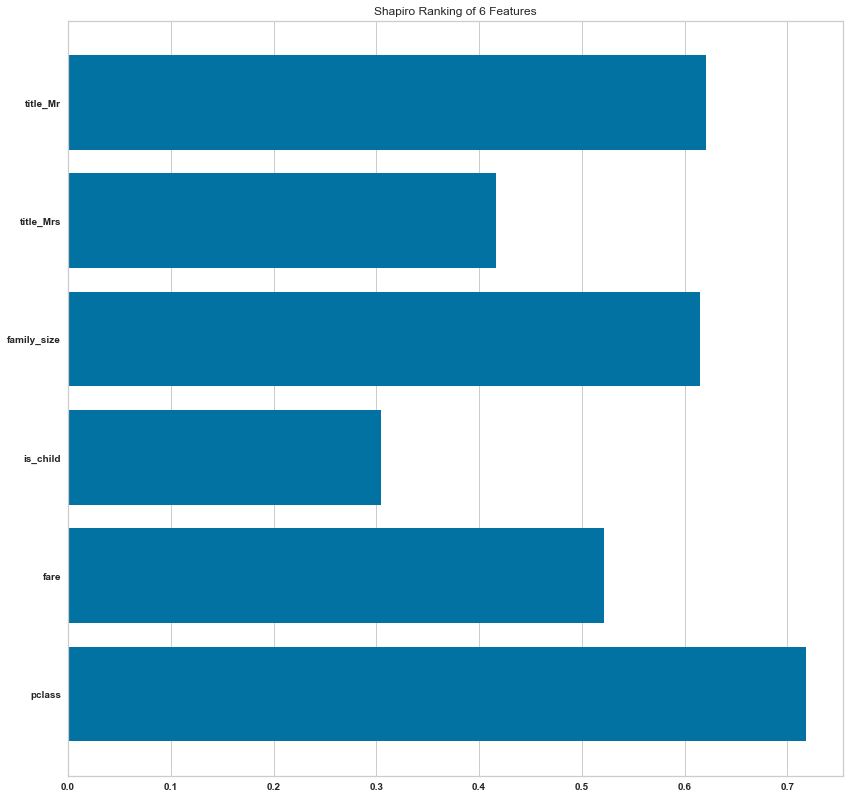

In [20]:
# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(algorithm='shapiro', size=(1000,1000))

visualizer.fit(X, y, )           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show();          # Finalize and render the figure

https://www.districtdatalabs.com/visualize-data-science-pipeline-with-yellowbrick

In [21]:
from cycler import cycler
import matplotlib as mpl
from yellowbrick.model_selection import FeatureImportances

FeatureImportances(absolute=True,
                   ax=<matplotlib.axes._subplots.AxesSubplot object at 0x11e414c18>,
                   colormap=None, colors=None, is_fitted='auto',
                   labels=Index(['title_Mr', 'title_Mrs', 'family_size', 'is_child', 'fare', 'pclass'], dtype='object'),
                   model=None, relative=False, stack=False, xlabel=None)

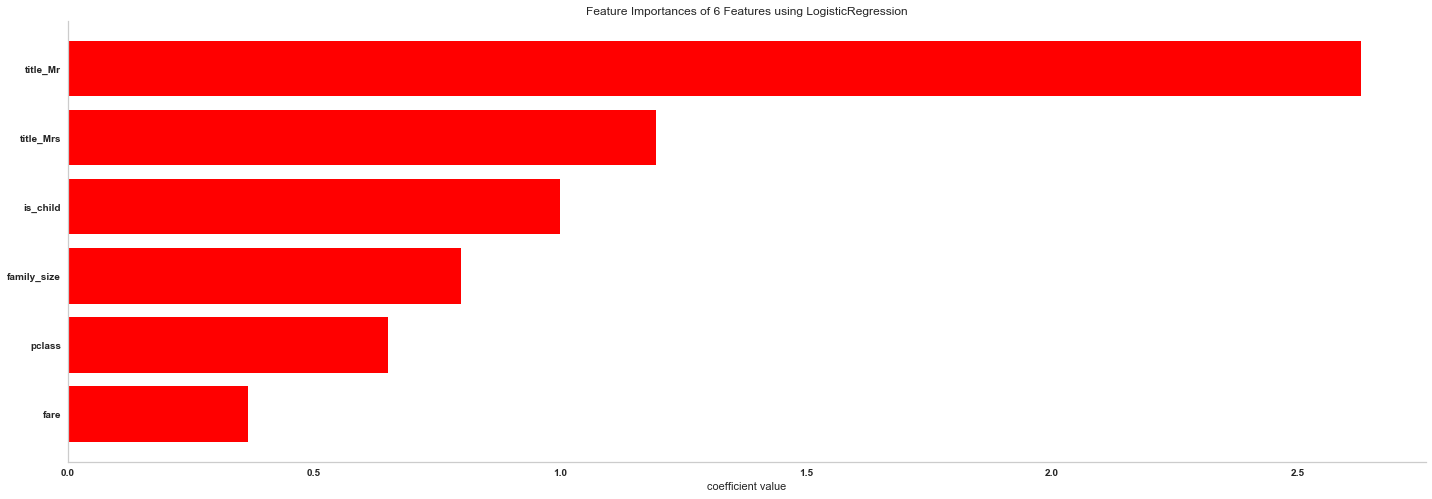

In [23]:
# Create a new figure
mpl.rcParams['axes.prop_cycle'] = cycler('color', ['red'])
fig = plt.gcf()
fig.set_size_inches(20,20)
ax = plt.subplot(311)
labels = X.columns

viz = FeatureImportances(model, ax=ax, labels=labels, relative=False, absolute=True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)

# Fit and display
viz.fit(X, y)
viz.poof()

17